### Get Started with Natural Language Processing 

~ In this notebook I will be exploring NLP Toolkit NLTK to preprocess already gathered tweets for sentiments analysis
<br >
~ I am going to use a datasets contains 10K tweets that are already annotated


In [38]:
# Importing necessary libraries 
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random
import re
import string
from nltk.stem import PorterStemmer        
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

### 1- Download and explore the dataset

In [3]:
# Download twitter_sample datasets

nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/mozaini/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [4]:
# Segment the dataset by splitting into positive and negative datasets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [10]:
# overveiw of postive tweets
positive_tweets[:2]

['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!']

In [13]:
# overveiw on postive tweets
negative_tweets[:2]

['hopeless for tmr :(',
 "Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :("]

In [16]:
# Now let's look at the # of positive tweets and number of negative tweets leveraging len() function

print('positive tweets number: ', len(positive_tweets), "type of tweets:", type(positive_tweets) )
print('negative  tweets number: ', len(negative_tweets), "type of negative tweets:", type(negative_tweets))

positive tweets number:  5000 type of tweets: <class 'list'>
negative  tweets number:  5000 type of negative tweets: <class 'list'>


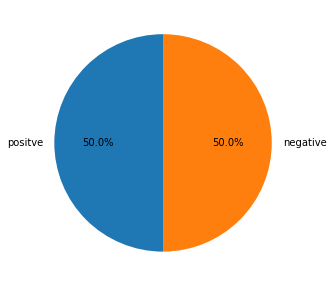

In [23]:
fig = plt.figure(figsize=(5, 5))
plt.pie([len(positive_tweets), len(negative_tweets)], labels=("positve","negative"), autopct='%1.1f%%', startangle=90);
plt.show()

### 2- Preprocessing 
* Preprocessing for NLP project means that we need to:
- Tokenizing the string (spliti each word)
- Lowercasing all words
- Remove stop words and punctuation
- Stemming 


In [24]:
# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mozaini/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
# reterive a random tweet 
tweet = positive_tweets[2277]
print('\033[92m' + tweet)
print('\033[94m')

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i



In [29]:
# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '',tweet)
# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+','',tweet2)
# remove hashtag sign #
tweet2 = re.sub(r'#','',tweet2)
print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [31]:
print('\033[92m' + tweet2)
print('\033[94m')

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 



In [36]:
# instantiate tokenizer class

tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
# Tokenize tweets

tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [42]:
# remove stopwords 

# download stop words
en_stopwords = stopwords.words('english')

print(en_stopwords)
print('\nPunctuaction \n')
print(string.punctuation)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [44]:
# Now we will remove stopwords and punctuations from all tweets

cleaned_tweets = []

for word in tweet_tokens:
    if word not in en_stopwords and word not in string.punctuation:
        cleaned_tweets.append(word)

print('\nCleaned tweet\n')
print(cleaned_tweets)
        


Cleaned tweet

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


In [47]:
# The last step in preorocessing tweet is to stem each word, meaning we convert them
# to their most orginal forms

stemmer = PorterStemmer()

stemed_tweet = []

for word in cleaned_tweets:
    stemed_word = stemmer.stem(word)
    stemed_tweet.append(stemed_word)
    
print('\nstemmed words\n',stemed_tweet)


stemmed words
 ['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


### Combiend all the preprocess steps in one function

In [59]:
def process_tweet(tweet):
    
    """
    Process tweet function
    Input:
        tweet: a string containing a tweet
    Output:
        cleaned_tweet : a list of words containing the processed tweet's words
    """
    
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks    
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean


In [60]:
# test process_tweet()

tweet = positive_tweets[2277]
print(tweet,'\n')

clean_tweet = process_tweet(tweet)
print(clean_tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i 

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
